# Bike Buyers

Dataset link: <https://www.kaggle.com/datasets/heeraldedhia/bike-buyers/>
<br>The goal here is to practice the scikit-learn library.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [77]:
df = pd.read_csv('data/bike_buyers_clean.csv')
df.drop('ID', axis=1, inplace=True)

In [78]:
df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [80]:
numeric_variables = df.select_dtypes(include=np.number).columns.to_list()
print(f'numeric variables: {numeric_variables}')

categorical_variables = df.select_dtypes(include='O').columns.to_list()
print(f'categorical variables: {categorical_variables}')

numeric variables: ['Income', 'Children', 'Cars', 'Age']
categorical variables: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [81]:
df[numeric_variables].describe()

,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56140.000000,1.908000,1.452000,44.190000
std,31081.609779,1.626094,1.124705,11.353537
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [82]:
def plot_y_pie_chart(value_counts):
    labels = value_counts.index
    values = value_counts.values

    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%')    

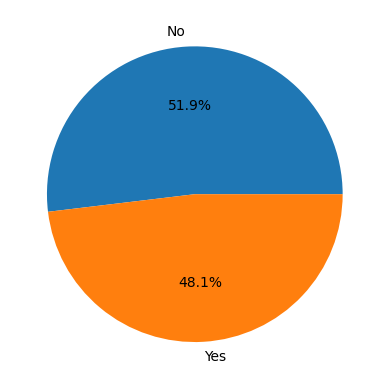

In [83]:
purchaside_bike_counts = df['Purchased Bike'].value_counts()
plot_y_pie_chart(purchaside_bike_counts)


Dataset is well balanced between examples of customers that purchased the bike and those who didn't.

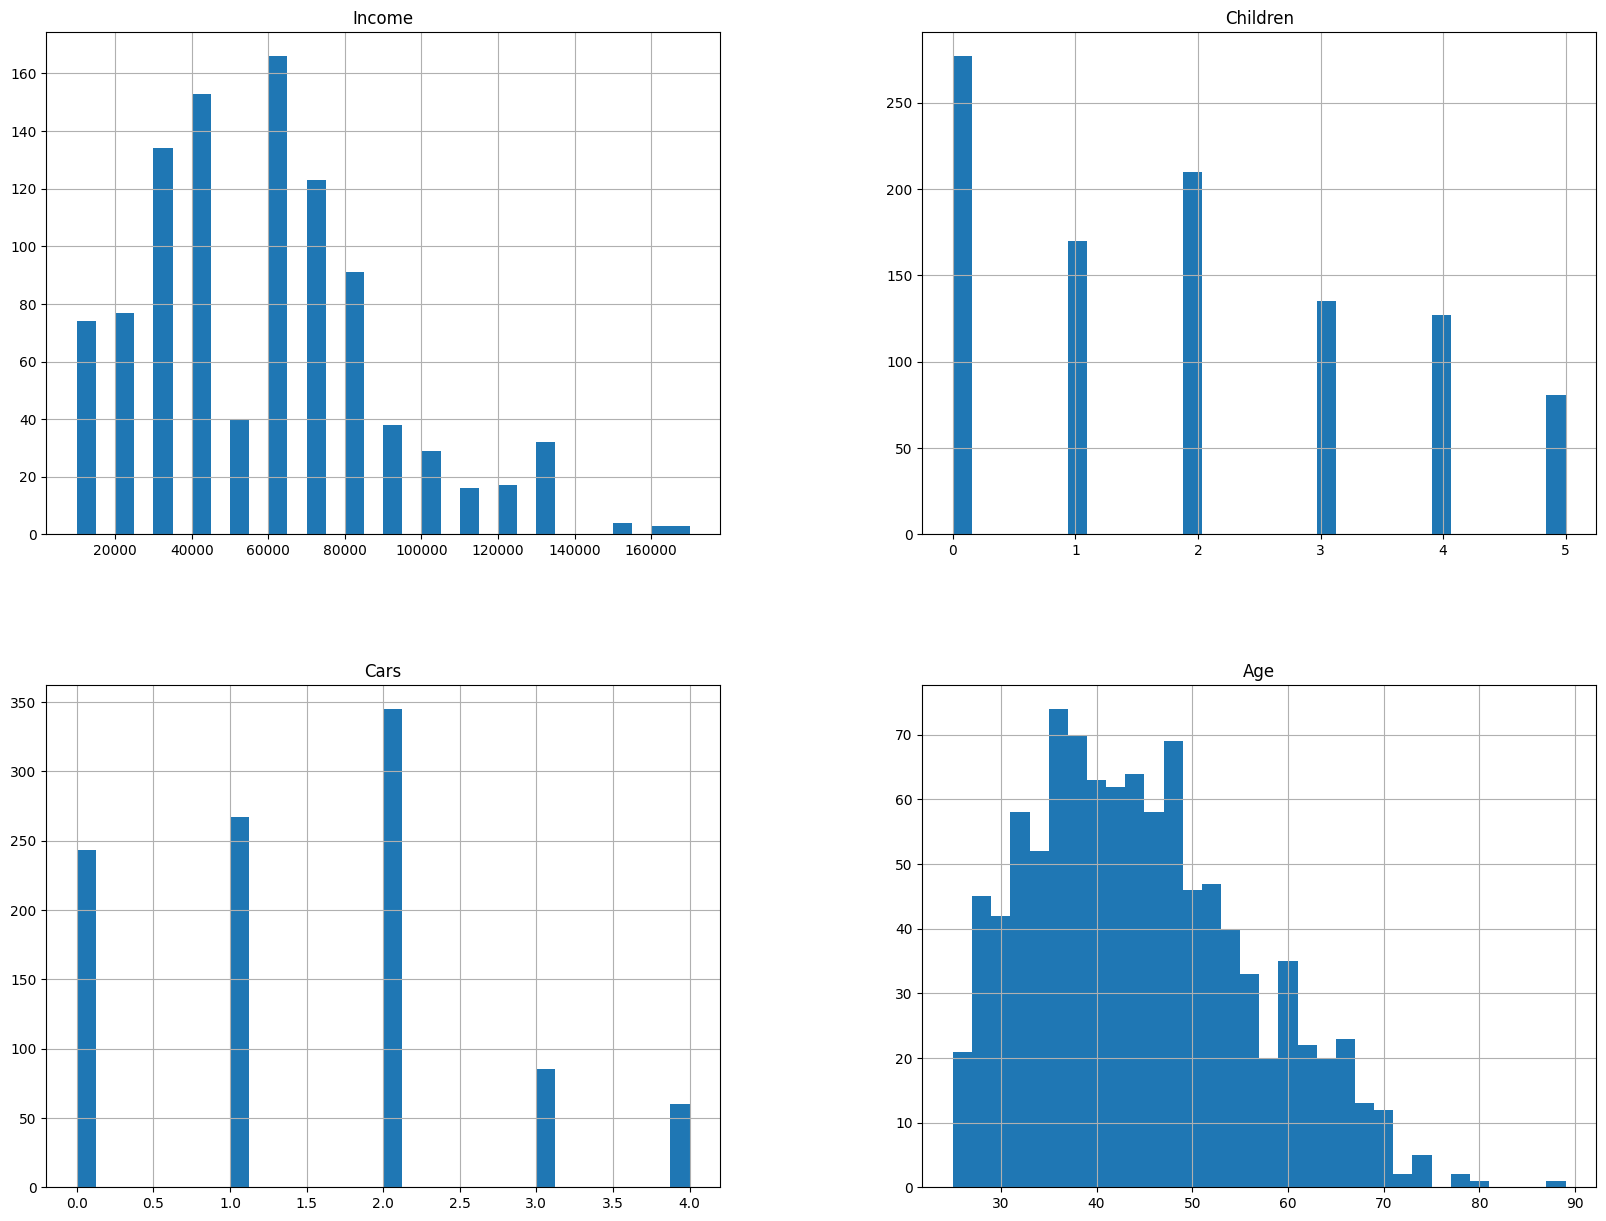

In [84]:
number_of_bins = int(np.sqrt(1000).round())
df[numeric_variables].hist(bins=number_of_bins, figsize=(20,15))
plt.show()

**Aurelien Geron** recommends separating the dataset in the train and test sets right in the beginning to avoid the possible data snooping bias. This is the first time that I hear about this concern and recommended approach. What I understood from his comment in [his book](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-scikit-learn-tensorflow/dp/8550803812/ref=asc_df_8550803812/?tag=googleshopp00-20&linkCode=df0&hvadid=379748659420&hvpos=&hvnetw=g&hvrand=7233050575186236478&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001533&hvtargid=pla-812887614657&psc=1&mcid=4ae1075609fa336e931d99bbe1320cb8) and [this page](https://datascience.stanford.edu/news/data-snooping) is that by shuffling and repeating tests too many times, the chances of getting a positive result increases due to the probabilistic nature of the models. By settling with a initial train and test datasets, we will avoid getting into the problem of data snooping.

Let's do this:

In [53]:
X = df.drop(['Purchased Bike'], axis=1)
y = df['Purchased Bike']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(f'Number of train examples: {len(X_train)}')
print(f'Number of test examples: {len(X_test)}')

Number of train examples: 800
Number of test examples: 200


#### Let's check the distribution of the y_train:

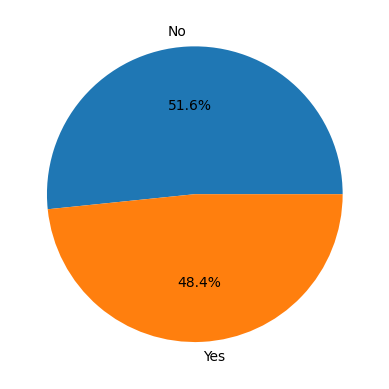

In [62]:
plot_y_pie_chart(y_train.value_counts())

Similar to the complete data.

How is the distribution of the other columns? Does it make sense to apply a stratified approach?

#### Boxplot with numeric variables

In [70]:
# reconstructing the dataframe feels wrong
df_train = X_train.copy()
df_train['Purchased Bike'] = y_train

<Axes: xlabel='Purchased Bike', ylabel='Age'>

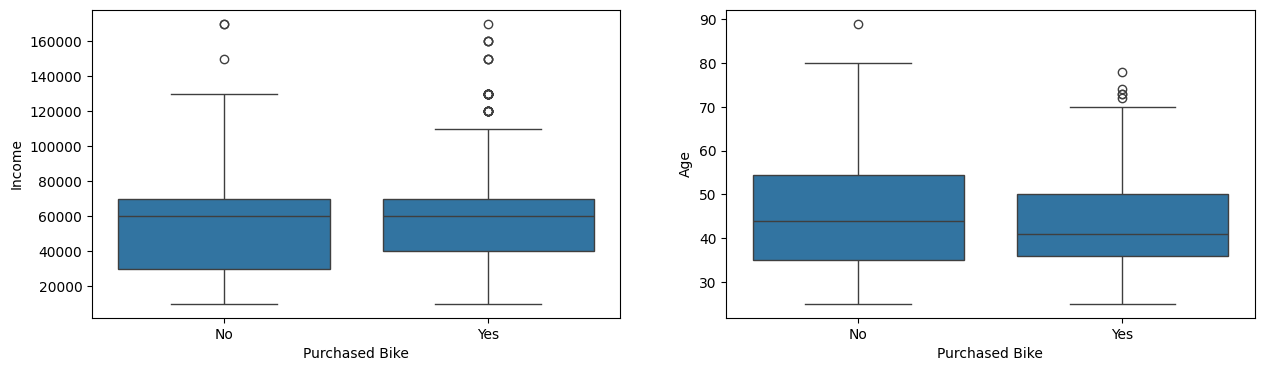

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.boxplot(ax=axes[0], x='Purchased Bike', y='Income', data=df)
sns.boxplot(ax=axes[1], x='Purchased Bike', y='Age', data=df)

#### Cross trabulation with the Categorical variables

['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']

In [118]:
pd.crosstab(df_train['Purchased Bike'], df_train['Cars'], normalize='columns')*100

Cars,0,1,2,3,4
Purchased Bike,,,,,
No,35.353535,42.986425,64.444444,61.904762,72.916667
Yes,64.646465,57.013575,35.555556,38.095238,27.083333


In [117]:
pd.crosstab(df_train['Purchased Bike'], df_train['Children'], normalize='columns')*100

Children,0,1,2,3,4,5
Purchased Bike,,,,,,
No,49.356223,41.176471,53.529412,47.222222,55.681818,78.461538
Yes,50.643777,58.823529,46.470588,52.777778,44.318182,21.538462


In [120]:
pd.crosstab(df_train['Purchased Bike'], df_train['Gender'], normalize='columns')*100

Gender,Female,Male
Purchased Bike,,
No,52.956298,50.364964
Yes,47.043702,49.635036


In [121]:
pd.crosstab(df_train['Purchased Bike'], df_train['Marital Status'], normalize='columns')*100

Marital Status,Married,Single
Purchased Bike,,
No,56.705882,45.866667
Yes,43.294118,54.133333


In [122]:
pd.crosstab(df_train['Purchased Bike'], df_train['Education'], normalize='columns')*100

Education,Bachelors,Graduate Degree,High School,Partial College,Partial High School
Purchased Bike,,,,,
No,43.852459,46.099291,57.664234,53.738318,73.4375
Yes,56.147541,53.900709,42.335766,46.261682,26.5625


In [123]:
pd.crosstab(df_train['Purchased Bike'], df_train['Home Owner'], normalize='columns')*100

Home Owner,No,Yes
Purchased Bike,,
No,51.004016,51.905626
Yes,48.995984,48.094374


In [124]:
pd.crosstab(df_train['Purchased Bike'], df_train['Commute Distance'], normalize='columns')*100

Commute Distance,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
Purchased Bike,,,,,
No,43.478261,53.472222,73.75,44.354839,60.130719
Yes,56.521739,46.527778,26.25,55.645161,39.869281


In [125]:
pd.crosstab(df_train['Purchased Bike'], df_train['Region'], normalize='columns')*100

Region,Europe,North America,Pacific
Purchased Bike,,,
No,50.826446,55.472637,42.948718
Yes,49.173554,44.527363,57.051282
